In [23]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [24]:
df = pd.read_csv('/Users/kazhitu/Documents/YelpDataset_Reviews_Stars_20K.csv', header = None)
ldf = pd.read_csv('/Users/kazhitu/Documents/YelpDataset_Reviews_Stars_20K.csv', header = None)

In [25]:
print(df)

       0                                                  1
0      4  This place is a area staple! Been around for y...
1      4  Got my mojo back after having a few of their a...
2      4  Don't go here for the decor. but the staff is ...
3      5  I believe in awarding stars bearing in mind th...
4      4  If you like fried food and laid back. then thi...
5      2  I was not impressed with how gross this place ...
6      3  Okay bar food. Nice bar setting but food is av...
7      4  Was boozin and cruisin with my canine comrade....
8      3  Alright. i was about to give it 3 stars bc it'...
9      4  Okay. so it is a bar with an old fashioned fam...
10     1  Unmmmm. no. It's a bar with tables in the next...
11     1  Have dined in twice now and today was take out...
12     3  This place is very dark and dingy on the insid...
13     4  This small tavern. has great burgers and the b...
14     3  The food is typical. Wait how much was my meal...
15     5  There'a a reason that everyone

In [26]:
def filterLen(docs, minlen=3):
    import re, string
    docs_raw = [re.sub('[\W_]+','',t) for t in docs.split() if len(t) >= minlen]
    s = " "
    return s.join(docs_raw)

In [27]:
import re
df[1] = df[1].apply(filterLen)
ldf[1] = ldf[1].apply(filterLen)

In [28]:
xtrain, xtest, ytrain, ytest = df[1][:15000], df[1][15000:], df[0][:15000], df[0][15000:]

In [29]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
def lemma(docs):
    wnl = WordNetLemmatizer()
    word = " "
    return word.join([wnl.lemmatize(i) for i in docs.split()])

In [30]:
import nltk
from nltk.corpus import stopwords

def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", raw_review)
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 

In [31]:
clean_Train = review_to_words( xtrain[0] )
print(xtrain[0])
print(clean_Train)

This place area staple Been around for years and not much has changed see this good thing Stable and reliableMy family goes every year for St Pattys Day corn beef Very nice place for bar night dinner catch with some friends over drinks
place area staple around years much changed see good thing stable reliablemy family goes every year st pattys day corn beef nice place bar night dinner catch friends drinks


In [32]:
ldf[1] = df[1].apply(lemma)

In [33]:
xtrainlemma, xtestlemma, ytrainlemma, ytestlemma = ldf[1][:15000], ldf[1][15000:], df[0][:15000], df[0][15000:]

In [34]:
clean_Train2 = review_to_words(xtrainlemma[0])
print(clean_Train2)

place area staple around year much ha changed see good thing stable reliablemy family go every year st pattys day corn beef nice place bar night dinner catch friend drink


In [35]:
num_train_reviews = xtrain.size
num_test_reviews = xtest.size
print(num_train_reviews, num_test_reviews)

(15000, 5000)


In [36]:
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_train_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews.append( review_to_words( xtrain[i] ) )

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

In [38]:
print train_data_features.shape

(15000, 5000)


In [39]:
vocab = vectorizer.get_feature_names()
print vocab

[u'ability', u'able', u'absolute', u'absolutely', u'abundance', u'abundant', u'ac', u'accent', u'accept', u'acceptable', u'accepted', u'access', u'accessible', u'accident', u'accidentally', u'accommodate', u'accommodated', u'accommodating', u'accompanied', u'accompany', u'accompanying', u'according', u'accordingly', u'account', u'accurate', u'ackee', u'acknowledge', u'acknowledged', u'across', u'act', u'acted', u'action', u'actual', u'actually', u'add', u'added', u'addicted', u'addictive', u'adding', u'addition', u'additional', u'additionally', u'address', u'adds', u'adequate', u'adjacent', u'adjust', u'admit', u'admittedly', u'adorable', u'adore', u'adult', u'adults', u'advance', u'advantage', u'adventure', u'adventurous', u'advertise', u'advertised', u'advertising', u'advice', u'advise', u'advised', u'afford', u'affordable', u'aforementioned', u'afraid', u'afternoon', u'afterwards', u'againthe', u'age', u'aged', u'ages', u'ago', u'agree', u'agreed', u'ah', u'ahead', u'ahi', u'aint', 

In [40]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print count, tag

17 ability
371 able
89 absolute
531 absolutely
18 abundance
16 abundant
19 ac
21 accent
72 accept
56 acceptable
23 accepted
40 access
19 accessible
29 accident
18 accidentally
66 accommodate
18 accommodated
89 accommodating
58 accompanied
26 accompany
39 accompanying
60 according
18 accordingly
36 account
22 accurate
17 ackee
28 acknowledge
30 acknowledged
440 across
46 act
22 acted
24 action
138 actual
1151 actually
343 add
297 added
21 addicted
18 addictive
70 adding
157 addition
101 additional
26 additionally
47 address
60 adds
51 adequate
19 adjacent
19 adjust
135 admit
45 admittedly
30 adorable
18 adore
33 adult
32 adults
43 advance
54 advantage
36 adventure
48 adventurous
38 advertise
69 advertised
44 advertising
63 advice
25 advise
24 advised
25 afford
141 affordable
27 aforementioned
52 afraid
289 afternoon
51 afterwards
16 againthe
58 age
22 aged
48 ages
460 ago
160 agree
93 agreed
19 ah
160 ahead
38 ahi
53 aint
32 aioli
90 air
95 airport
33 airy
37 aka
17 ala
39 alas
35 albei

In [41]:
print(xtest.shape)
print(xtest[15000])

(5000,)
Someone please change the cooking oil With the construction Rt 51 has been very long time since decided put with the craziness that makes this intersection nagging for fried fish however sent daughter and this LJS Mistake number was ignoring the deserted parking lot Mistake number was placing order the drive thru and eating our piece fish and more dinners after the smell old cooking oil put damper our nagging for fried fishThe service the drive thru was friendly the girl the window friendly but the smell old cooking oil not much Not soul sight this LJS Yes there are other places get great fried fish and after our experience perhaps its time let this LJS walk the plank off our list The fish was edible not the usual crunchy crumbly LJS fish The hush puppies were soggy from either drowning old oil too long sitting under heat lamps too long The fries endured the same sad torture the others Cheap yes but not worth the money Rt traffic anymore


In [42]:
# Initialize an empty list to hold the clean reviews
clean_test_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_test_reviews):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_test_reviews.append( review_to_words( xtest[i+15000] ) )

In [43]:
# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

In [44]:
print test_data_features.shape

(5000, 5000)


In [45]:
vocab = vectorizer.get_feature_names()
print vocab

[u'ability', u'able', u'absolute', u'absolutely', u'abundance', u'abundant', u'ac', u'accent', u'accept', u'acceptable', u'accepted', u'access', u'accessible', u'accident', u'accidentally', u'accommodate', u'accommodated', u'accommodating', u'accompanied', u'accompany', u'accompanying', u'according', u'accordingly', u'account', u'accurate', u'ackee', u'acknowledge', u'acknowledged', u'across', u'act', u'acted', u'action', u'actual', u'actually', u'add', u'added', u'addicted', u'addictive', u'adding', u'addition', u'additional', u'additionally', u'address', u'adds', u'adequate', u'adjacent', u'adjust', u'admit', u'admittedly', u'adorable', u'adore', u'adult', u'adults', u'advance', u'advantage', u'adventure', u'adventurous', u'advertise', u'advertised', u'advertising', u'advice', u'advise', u'advised', u'afford', u'affordable', u'aforementioned', u'afraid', u'afternoon', u'afterwards', u'againthe', u'age', u'aged', u'ages', u'ago', u'agree', u'agreed', u'ah', u'ahead', u'ahi', u'aint', 

In [46]:
import numpy as np

# Sum up the counts of each vocabulary word
dist = np.sum(test_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print count, tag

11 ability
100 able
32 absolute
142 absolutely
5 abundance
6 abundant
7 ac
6 accent
20 accept
37 acceptable
4 accepted
8 access
2 accessible
8 accident
10 accidentally
14 accommodate
3 accommodated
26 accommodating
22 accompanied
5 accompany
4 accompanying
17 according
3 accordingly
15 account
13 accurate
0 ackee
17 acknowledge
20 acknowledged
167 across
22 act
10 acted
12 action
55 actual
420 actually
119 add
94 added
3 addicted
3 addictive
20 adding
44 addition
39 additional
5 additionally
26 address
6 adds
16 adequate
2 adjacent
2 adjust
47 admit
12 admittedly
1 adorable
2 adore
9 adult
10 adults
16 advance
12 advantage
8 adventure
14 adventurous
18 advertise
29 advertised
10 advertising
26 advice
9 advise
8 advised
4 afford
24 affordable
7 aforementioned
21 afraid
104 afternoon
16 afterwards
8 againthe
18 age
10 aged
11 ages
169 ago
58 agree
45 agreed
5 ah
80 ahead
3 ahi
16 aint
5 aioli
40 air
37 airport
6 airy
14 aka
6 ala
16 alas
20 albeit
35 alcohol
2 alcoholic
8 ale
9 alfredo
4

In [47]:
print test_data_features
print train_data_features

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [48]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(train_data_features, ytrain).predict(test_data_features)

In [49]:
print (y_pred[:300])
print (ytest[:300])

[1 1 4 1 1 1 1 1 2 2 2 1 1 5 1 1 1 5 3 1 1 4 1 5 1 1 1 5 1 1 4 2 3 1 1 1 1
 2 1 1 2 1 1 1 1 1 1 1 1 1 4 1 4 2 1 2 2 1 3 4 2 2 2 3 1 1 1 1 2 1 4 1 2 1
 1 2 2 1 3 1 1 1 2 2 5 1 5 4 4 3 3 2 1 1 3 5 1 1 1 1 1 5 3 5 4 1 1 3 1 5 1
 3 4 1 4 2 1 1 5 1 2 5 2 1 3 4 2 3 1 5 1 2 1 5 4 2 5 1 1 4 2 5 4 1 5 1 5 2
 5 4 2 1 1 1 1 1 1 1 5 1 1 1 5 2 2 3 4 4 4 4 1 2 5 1 3 1 1 5 1 1 1 1 1 2 1
 1 1 1 2 5 1 1 1 4 1 1 1 1 1 1 1 1 5 1 5 1 1 4 5 1 4 1 1 1 1 1 1 1 5 1 1 1
 1 1 1 1 4 5 1 5 5 1 5 1 5 1 1 1 1 1 4 2 1 1 1 1 1 1 5 1 1 1 1 1 1 5 1 2 5
 4 4 2 2 1 1 1 5 1 1 1 1 1 1 1 1 1 1 5 1 2 5 1 1 1 5 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
15000    2
15001    2
15002    2
15003    5
15004    3
15005    3
15006    3
15007    5
15008    1
15009    3
15010    1
15011    1
15012    2
15013    5
15014    3
15015    5
15016    5
15017    5
15018    5
15019    5
15020    5
15021    5
15022    3
15023    5
15024    5
15025    5
15026    5
15027    3
15028    1
15029    5
        ..
15270    2
15271    3
15272    3
15273    1
15274

In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, ytrain )

In [51]:
# Use the random forest to make sentiment label predictions
result = forest.predict(test_data_features)
print (result[:300])
print (ytest[:300])

[1 3 1 4 1 3 5 5 1 2 3 1 1 5 3 4 2 5 5 4 4 5 3 5 5 5 5 3 1 5 4 4 3 4 1 4 4
 1 4 3 1 1 1 4 1 1 4 3 4 4 3 2 3 4 1 2 1 2 4 1 1 1 3 4 4 5 4 3 4 2 4 1 4 3
 3 2 3 4 4 3 3 1 4 4 5 4 5 5 5 4 4 1 3 4 4 5 3 3 4 4 4 4 3 4 4 5 4 3 5 5 3
 1 4 1 4 2 1 1 4 2 3 5 5 4 3 4 1 4 3 5 4 3 1 4 4 4 2 2 1 2 5 5 5 1 4 1 3 5
 2 4 3 3 1 1 3 4 5 5 1 4 1 4 4 3 3 4 4 4 3 5 1 3 5 5 3 4 5 5 1 4 1 4 1 3 1
 4 1 3 4 3 4 5 5 3 5 5 5 1 5 5 5 5 5 5 5 5 1 4 5 5 4 1 5 1 1 1 3 1 4 1 1 1
 2 5 1 3 3 4 5 5 4 5 5 5 1 4 4 5 5 5 4 2 5 1 1 1 1 5 1 1 1 1 1 5 3 1 4 4 4
 4 4 3 3 4 2 1 1 5 3 1 1 4 4 1 4 1 5 5 3 3 5 2 5 5 5 5 4 5 5 5 5 1 4 4 4 5
 5 1 3 1]
15000    2
15001    2
15002    2
15003    5
15004    3
15005    3
15006    3
15007    5
15008    1
15009    3
15010    1
15011    1
15012    2
15013    5
15014    3
15015    5
15016    5
15017    5
15018    5
15019    5
15020    5
15021    5
15022    3
15023    5
15024    5
15025    5
15026    5
15027    3
15028    1
15029    5
        ..
15270    2
15271    3
15272    3
15273    1
15274

In [52]:
#The correctness of random forest
correct = 0
for i in range(0,4999):
    if (ytest[i+15000] == result[i]):
        correct += 1
acc = correct/5000.00
print acc

0.4054


In [53]:
#The correctness of naive bayes
correct = 0
for i in range(0,4999):
    if (ytest[i+15000] == y_pred[i]):
        correct += 1
acc = correct/5000.00
print "Accuracy of Naive bayes w/ countvectorizer: %f" %acc

Accuracy of Naive bayes w/ countvectorizer: 0.387600


In [54]:
#naive bayes
err = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range (0,4999):
    if (ytest[i+15000] != y_pred[i]):
        err[y_pred[i] - ytest[i+15000] + 4] += 1

print "Error distribution of Naive bayes w/ countvectorizer:"
print err

Error distribution of Naive bayes w/ countvectorizer:
[221, 33, 530, 1452, 0, 416, 282, 105, 22]


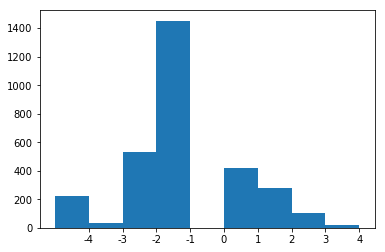

In [55]:
import numpy as np
import matplotlib.pyplot as plt

bar_width = 1. # set this to whatever you want
data = np.array(err)
positions = np.arange(9)
plt.bar(positions, data, bar_width)
plt.xticks(positions + bar_width / 2, ('-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'))
plt.show()

In [56]:
#random forest
err = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range (0,4999):
    if (ytest[i+15000] != result[i]):
        err[result[i] - ytest[i+15000] + 4] += 1    
print err

[22, 2, 105, 835, 0, 1063, 643, 236, 66]


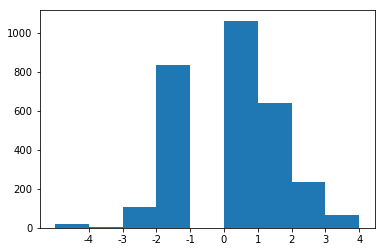

In [57]:
bar_width = 1. # set this to whatever you want
data = np.array(err)
positions = np.arange(9)
plt.bar(positions, data, bar_width)
plt.xticks(positions + bar_width / 2, ('-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'))
plt.show()

In [58]:
#random forest 
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 300) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( train_data_features, ytrain )
result = forest.predict(test_data_features)
#The correctness of random forest
correct = 0
for i in range(0,4999):
    if (ytest[i+15000] == result[i]):
        correct += 1
acc = correct/5000.00
print acc

0.4036


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#vectorizer = TfidfVectorizer(min_df=1)
#X = vectorizer.fit_transform(clean_train_reviews)
#idf_train = vectorizer.toarray()
#print(idf_train)
transformer = TfidfTransformer(smooth_idf=False)
trainidf = transformer.fit_transform(train_data_features)
trainidf = trainidf.toarray()
print(trainidf)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [60]:
#vectorizer = TfidfVectorizer(min_df=1)
#X = vectorizer.fit_transform(clean_test_reviews)
#idf_test = vectorizer.idf_
#print(idf_test)
transformer = TfidfTransformer(smooth_idf=False)
testidf = transformer.fit_transform(test_data_features)
testidf = testidf.toarray()
print(testidf)

/Users/kazhitu/anaconda2/lib/python2.7/site-packages/sklearn/feature_extraction/text.py:1037: RuntimeWarning: divide by zero encountered in divide
  idf = np.log(float(n_samples) / df) + 1.0


[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [61]:
print(testidf.shape)
print(trainidf.shape)

(5000, 5000)
(15000, 5000)


In [62]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred2 = gnb.fit(trainidf, ytrain).predict(testidf)

In [63]:
#The correctness of naive bayes
correct = 0
for i in range(0,4999):
    if (ytest[i+15000] == y_pred2[i]):
        correct += 1
acc = correct/5000.00
print "Accuracy of Naive Bayes %f" % acc

Accuracy of Naive Bayes 0.393400


In [64]:
err = [0, 0, 0, 0, 0, 0, 0, 0, 0]
for i in range (0,4999):
    if (ytest[i+15000] != y_pred2[i]):
        err[y_pred2[i] - ytest[i+15000] + 4] += 1

print "Error distribution of naive bayes:"
print err

Error distribution of naive bayes:
[110, 59, 387, 1258, 0, 563, 398, 206, 51]


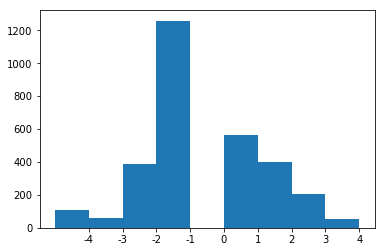

In [65]:
bar_width = 1. # set this to whatever you want
data = np.array(err)
positions = np.arange(9)
plt.bar(positions, data, bar_width)
plt.xticks(positions + bar_width / 2, ('-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'))
plt.show()

In [66]:
vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, analyzer='word', 
           stop_words='english')
X = vectorizer.fit_transform(clean_test_reviews)
idf_test = X.toarray()
print(idf_test)
print(idf_test.shape)
Y = vectorizer.fit_transform(clean_train_reviews)
idf_train = Y.toarray()
print(idf_train.shape)
print(idf_train)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(5000, 28611)
(15000, 57742)
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [67]:
# Initialize an empty list to hold the clean reviews
clean_train_reviews_lemma = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_train_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_train_reviews_lemma.append( review_to_words( xtrainlemma[i] ) )

from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features_lemma = vectorizer.fit_transform(clean_train_reviews_lemma)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features_lemma = train_data_features_lemma.toarray()

In [68]:
# Initialize an empty list to hold the clean reviews
clean_test_reviews_lemma = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_test_reviews):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_test_reviews_lemma.append( review_to_words( xtestlemma[i+15000] ) )

In [69]:
test_data_features_lemma = vectorizer.transform(clean_test_reviews_lemma)
test_data_features_lemma = test_data_features_lemma.toarray()

In [70]:
print (test_data_features_lemma.shape, train_data_features_lemma.shape)

((5000, 5000), (15000, 5000))


In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_lemma = gnb.fit(train_data_features_lemma, ytrainlemma).predict(test_data_features_lemma)

In [72]:
#The correctness of naive bayes
correct = 0
for i in range(0,4999):
    if (ytest[i+15000] == y_pred_lemma[i]):
        correct += 1
acc = correct/5000.00
print "Accuracy of Naive Bayes after lemma is %f" % acc

Accuracy of Naive Bayes after lemma is 0.384800


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#vectorizer = TfidfVectorizer(min_df=1)
#X = vectorizer.fit_transform(clean_train_reviews)
#idf_train = vectorizer.toarray()
#print(idf_train)
transformer = TfidfTransformer(smooth_idf=False)
trainidf_lemma = transformer.fit_transform(train_data_features_lemma)
trainidf_lemma = trainidf_lemma.toarray()
print(trainidf_lemma)
testidf_lemma = transformer.fit_transform(test_data_features_lemma)
testidf_lemma = testidf_lemma.toarray()
print(testidf_lemma)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [74]:
gnb = GaussianNB()
y_pred2_lemma = gnb.fit(trainidf_lemma, ytrainlemma).predict(testidf_lemma)

In [75]:
#The correctness of naive bayes
correct = 0
for i in range(0,4999):
    if (ytest[i+15000] == y_pred2_lemma[i]):
        correct += 1
acc = correct/5000.00
print "Accuracy of Naive Bayes after lemma w/ Tfidfvetorizer is %f" % acc

Accuracy of Naive Bayes after lemma w/ Tfidfvetorizer is 0.384600


In [76]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 1200) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()
# Initialize an empty list to hold the clean reviews
clean_test_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in xrange( 0, num_test_reviews):
    # Call our function for each one, and add the result to the list of
    # clean reviews
    clean_test_reviews.append( review_to_words( xtest[i+15000] ) )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
test_data_features = test_data_features.toarray()

Accuracy of Naive Bayes w/ 800 features is 0.390600
Error distribution of naive bayes:
[16, 15, 111, 721, 0, 786, 530, 490, 377]


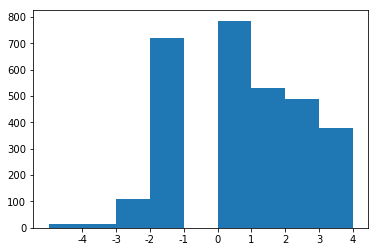

Accuracy of Naive Bayes w/ 1000 features is 0.399000
Error distribution of naive bayes:
[15, 17, 119, 714, 0, 777, 519, 486, 357]


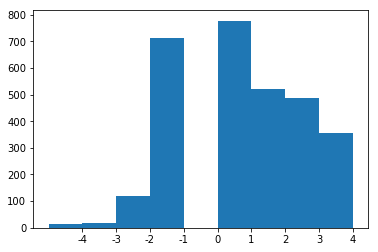

Accuracy of Naive Bayes w/ 1200 features is 0.410200
Error distribution of naive bayes:
[13, 18, 124, 762, 0, 750, 500, 478, 303]


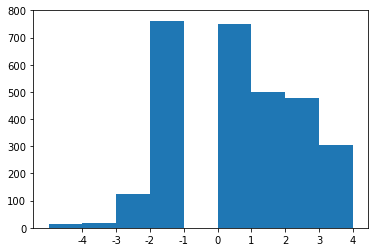

Accuracy of Naive Bayes w/ 1400 features is 0.406800
Error distribution of naive bayes:
[15, 18, 123, 768, 0, 727, 524, 482, 308]


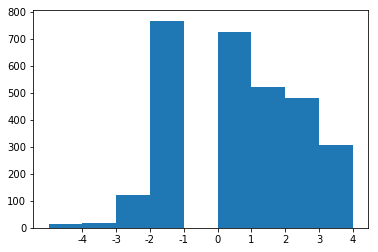

Accuracy of Naive Bayes w/ 1600 features is 0.406200
Error distribution of naive bayes:
[18, 19, 134, 810, 0, 725, 508, 457, 297]


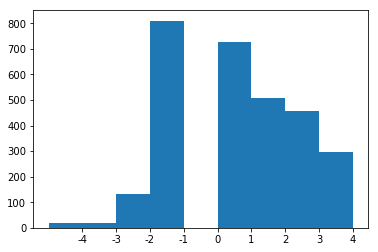

Accuracy of Naive Bayes w/ 1800 features is 0.403600
Error distribution of naive bayes:
[22, 19, 142, 858, 0, 697, 526, 438, 279]


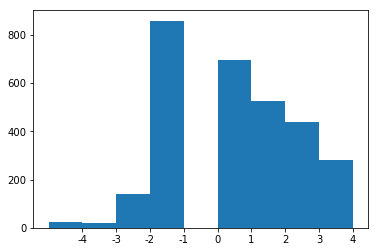

Accuracy of Naive Bayes w/ 2000 features is 0.400200
Error distribution of naive bayes:
[23, 15, 174, 880, 0, 688, 515, 434, 269]


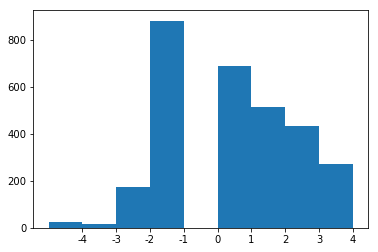

Accuracy of Naive Bayes w/ 2200 features is 0.399800
Error distribution of naive bayes:
[36, 16, 193, 972, 0, 646, 509, 386, 242]


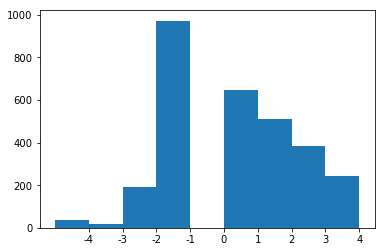

Accuracy of Naive Bayes w/ 2400 features is 0.404000
Error distribution of naive bayes:
[34, 20, 189, 977, 0, 622, 509, 386, 242]


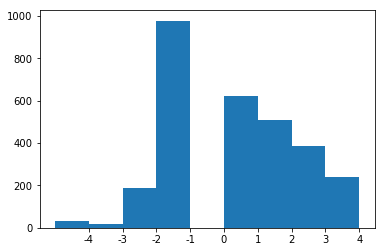

Accuracy of Naive Bayes w/ 2600 features is 0.411800
Error distribution of naive bayes:
[33, 18, 227, 1020, 0, 599, 488, 353, 202]


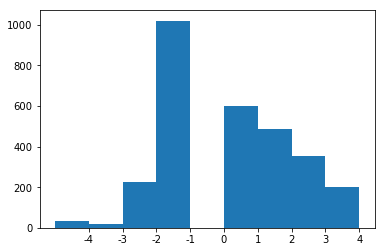

Accuracy of Naive Bayes w/ 2800 features is 0.413000
Error distribution of naive bayes:
[43, 21, 262, 1096, 0, 569, 461, 323, 159]


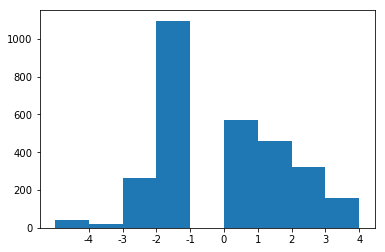

Accuracy of Naive Bayes w/ 3000 features is 0.415200
Error distribution of naive bayes:
[53, 24, 306, 1173, 0, 545, 439, 262, 121]


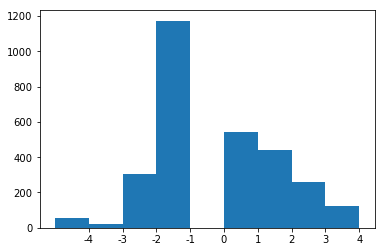

Accuracy of Naive Bayes w/ 3200 features is 0.412600
Error distribution of naive bayes:
[69, 18, 344, 1251, 0, 556, 401, 209, 88]


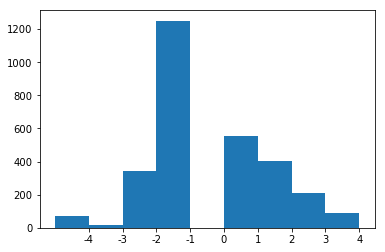

Accuracy of Naive Bayes w/ 3400 features is 0.409400
Error distribution of naive bayes:
[93, 24, 377, 1328, 0, 540, 355, 174, 61]


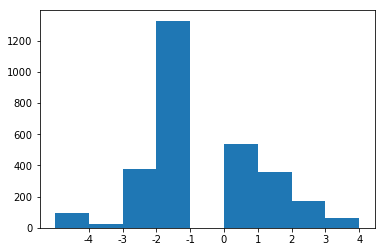

Accuracy of Naive Bayes w/ 3600 features is 0.406800
Error distribution of naive bayes:
[109, 22, 397, 1352, 0, 495, 357, 171, 62]


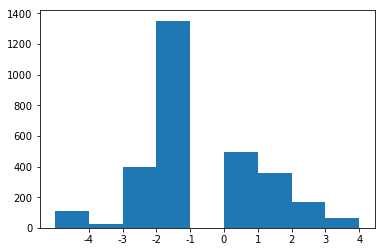

Accuracy of Naive Bayes w/ 3800 features is 0.401400
Error distribution of naive bayes:
[139, 27, 435, 1390, 0, 469, 334, 142, 56]


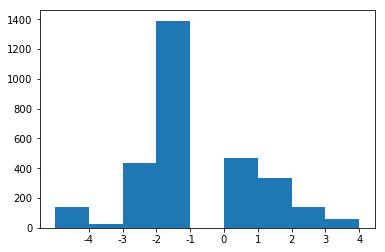

Accuracy of Naive Bayes w/ 4000 features is 0.394600
Error distribution of naive bayes:
[160, 28, 454, 1436, 0, 439, 334, 125, 50]


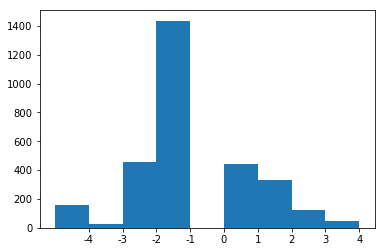

Accuracy of Naive Bayes w/ 4200 features is 0.396800
Error distribution of naive bayes:
[183, 28, 474, 1448, 0, 405, 319, 118, 40]


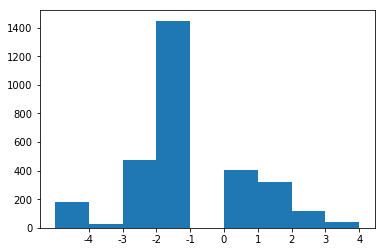

Accuracy of Naive Bayes w/ 4400 features is 0.395600
Error distribution of naive bayes:
[193, 36, 491, 1439, 0, 438, 283, 107, 34]


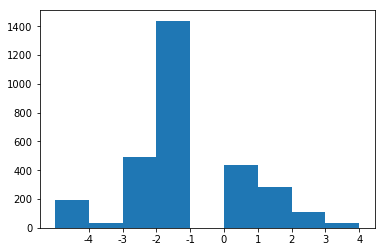

Accuracy of Naive Bayes w/ 4600 features is 0.392600
Error distribution of naive bayes:
[205, 36, 509, 1466, 0, 402, 286, 105, 27]


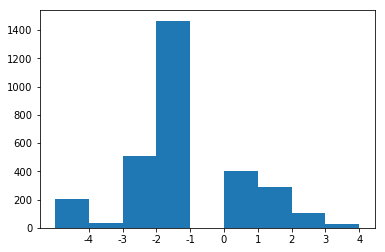

Accuracy of Naive Bayes w/ 4800 features is 0.387800
Error distribution of naive bayes:
[214, 34, 531, 1466, 0, 404, 281, 107, 23]


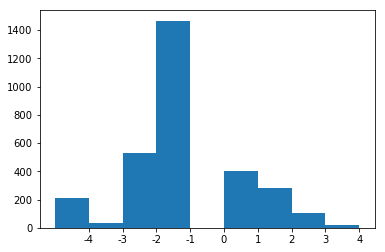

Accuracy of Naive Bayes w/ 5000 features is 0.387600
Error distribution of naive bayes:
[221, 33, 530, 1452, 0, 416, 282, 105, 22]


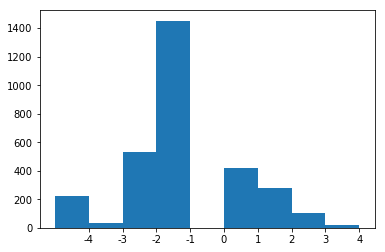

In [77]:
allacc = []
x_axis = []

for idx in range (800, 5200, 200):
    x_axis.append(idx)
    
    from sklearn.feature_extraction.text import CountVectorizer
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
# Initialize an empty list to hold the clean reviews
    clean_train_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
    for i in xrange( 0, num_train_reviews ):
    # Call our function for each one, and add the result to the list of
    # clean reviews
        clean_train_reviews.append( review_to_words( xtrain[i] ) )
    
    vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = idx) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
    train_data_features = vectorizer.fit_transform(clean_train_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
    train_data_features = train_data_features.toarray()

# Initialize an empty list to hold the clean reviews
    clean_test_reviews = []

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
    for i in xrange( 0, num_test_reviews):
    # Call our function for each one, and add the result to the list of
    # clean reviews
        clean_test_reviews.append( review_to_words( xtest[i+15000] ) )

# Get a bag of words for the test set, and convert to a numpy array
    test_data_features = vectorizer.transform(clean_test_reviews)
    test_data_features = test_data_features.toarray()

    gnb = GaussianNB()
    y_pred_feature = gnb.fit(train_data_features, ytrain).predict(test_data_features)

#The correctness of naive bayes
    correct = 0
    for i in range(0,4999):
        if (ytest[i+15000] == y_pred_feature[i]):
            correct += 1
    acc = correct/5000.00
    allacc.append(acc)
    print "Accuracy of Naive Bayes w/ %d features is %f" % (idx, acc)
    
    err = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    for i in range (0,4999):
        if (ytest[i+15000] != y_pred_feature[i]):
            err[y_pred_feature[i] - ytest[i+15000] + 4] += 1

    print "Error distribution of naive bayes:"
    print err
    
    bar_width = 1. # set this to whatever you want
    data = np.array(err)
    positions = np.arange(9)
    plt.bar(positions, data, bar_width)
    plt.xticks(positions + bar_width / 2, ('-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'))
    plt.show()

In [78]:
print allacc

[0.3906, 0.399, 0.4102, 0.4068, 0.4062, 0.4036, 0.4002, 0.3998, 0.404, 0.4118, 0.413, 0.4152, 0.4126, 0.4094, 0.4068, 0.4014, 0.3946, 0.3968, 0.3956, 0.3926, 0.3878, 0.3876]


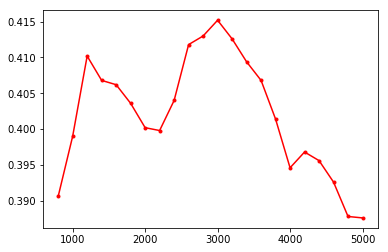

In [79]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_axis, allacc, marker='o', markersize=3, color="red")

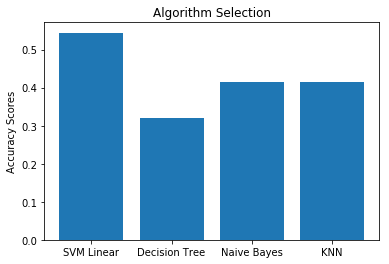

In [85]:
bar_width = 0.8 # set this to whatever you want
compare = [0.5444, 0.3198, 0.4154, 0.4152]
data = np.array(compare)
positions = np.arange(4)
plt.bar(positions, data, bar_width)
plt.xticks(positions, ('SVM Linear', 'Decision Tree', 'Naive Bayes', 'KNN'))
plt.ylabel('Accuracy Scores')
plt.title('Algorithm Selection')
plt.show()